In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.stats import entropy

import emc2d
from emc2d.sim import build_model, random_walk_trajectory, generate_frames

np.random.seed(2017)

In [3]:
intensity = np.load("./data/4BED_t40_d5000.npy")

In [4]:
max_drift = (10, 10)
mean_count= 0.02
motion_sigma = 3.
num_frames = 500
frame_size = (128, 128)
model_size = (frame_size[0] + 2*max_drift[0], frame_size[1] + 2*max_drift[1])
model = build_model(intensity, model_size=model_size, mean_count=mean_count)

# traj = random_walk_trajectory(max_drift=max_drift, num_steps=256, continuous=True, sigma=0.2)
# traj = np.round(traj).astype(int)
# translation_series = emc2d.utils.get_translation_series(model, window_size=(128, 128), translations=traj+max_drift)
# # translation_series *= 0.2/translation_series.mean()
# frames = np.random.poisson(translation_series)
frames, traj = generate_frames(
    intensity, 
    frame_size, 
    max_drift=max_drift, 
    num_frames=num_frames, 
    mean_count=mean_count, 
    motion_sigma=motion_sigma)

In [24]:
emc = emc2d.core.EMC(
    frames=frames, 
    frame_size=(128, 128), 
    max_drift=max_drift, 
    init_model='sum')

nnz / data_size = 1.95%, using dense data format
nnz / data_size = 1.95%, using dense data format
nnz / data_size = 1.95%, using dense data format


In [25]:
history = emc.run(iterations=30)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:06<00:00,  4.33it/s]


ValueError: autodetected range of [nan, nan] is not finite

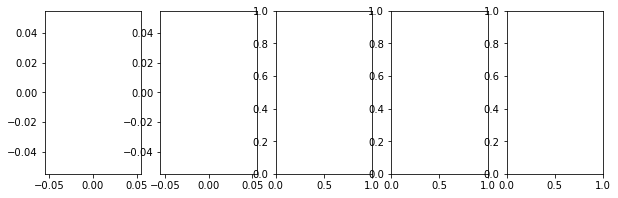

In [26]:
fig1 = emc2d.viz.show_emc_state(emc)

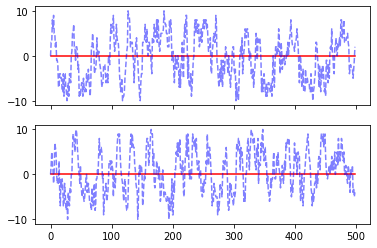

In [27]:
fig2 = emc2d.viz.show_maximum_likelihood_drifts(emc, reference=model, true_traj=traj)

??


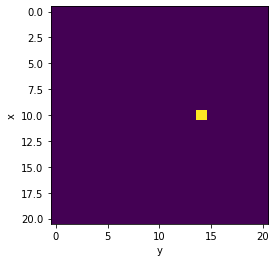

In [9]:
fig3, pmat = emc2d.viz.show_membership_probability(emc.membership_probability, frame_index=0, drift_radius=max_drift)

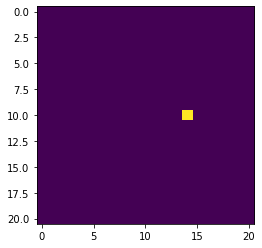

In [10]:
plt.imshow(pmat[0], vmin=0., vmax=0.001)

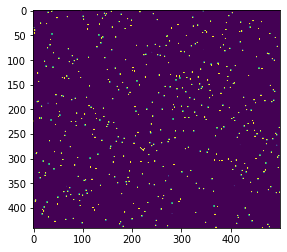

In [11]:
plt.imshow(emc.membership_probability, vmin=0, vmax=0.1)

In [12]:
pmat = emc.membership_probability.T

In [13]:
pmat = pmat.reshape(-1, 21, 21)

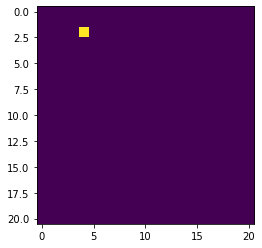

In [14]:
plt.imshow(pmat[2])

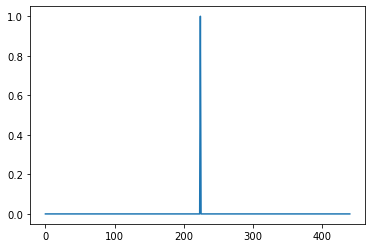

In [16]:
plt.plot(emc.membership_probability[:, 0])

In [20]:
emc.membership_probability.dtype

dtype('float64')